## **Zeroth-Order Optimization (ZOO) Attack and Binary Input Detector Using CIFAR-10**

This notebook demonstrates the implementation of the ZOO attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the CIFAR-10 dataset. The tasks covered in this notebook are:

1. Load the Required Libraries

2. Load the Dataset and Inspect the Data

3. Create a Deep Learning Model

4. Train and Evaluate the Deep Learning Model on CIFAR-10 Test Data

5. Implement ZOO Attack Using ART

6. Create Adversarial Samples Using the Z00 Attack

7. Evaluate the Deep Learning Model Against the Adversarial Samples

8. Create a Detector Model to Detect Adversarial Samples

9. Train and Evaluate the Detector Model

### **Zero-Order Optimization (ZOO) Attack - Overview**

The Zero-Order Optimization (ZOO) attack is a black-box adversarial attack introduced by Athalye, Carlini, and Wagner in 2018. This attack targets scenarios where the attacker has no access to the model's gradients or any internal information (such as architecture or weights). In contrast to attacks like FGSM or PGD, which rely on gradient information, ZOO uses zero-order optimization to generate adversarial examples by querying the model and using the output (e.g., class probabilities) to estimate gradients indirectly.

#### **Key Concepts**

**1. Black-box Attack**: The attacker only has access to the model’s outputs (e.g., logits or probabilities) for different inputs, without any access to the model's parameters, gradients, or internal structure.

**2. Zero-Order Optimization**: Instead of computing gradients directly, ZOO estimates the gradient using finite differences based on model queries. This is a numerical method where the gradient is approximated by observing how small changes to the input affect the output.

**3. Adversarial Example**: A perturbation of the input that is designed to make the model misclassify the input while keeping the perturbation imperceptible to humans.

#### **How Zero-Order Optimization (ZOO) Works**

The ZOO attack formulates the generation of adversarial examples as an optimization problem. The main goal is to find an input perturbation $δ$ that minimizes the loss or maximizes the misclassification score. This perturbation is computed using an optimization procedure, where the gradients are approximated using finite differences, i.e., by querying the model multiple times with perturbed inputs.
The ZOO Attack Formulation

#### **The ZOO attack optimizes the following objective function:**
$$L(x_{adv},x)=E[Loss(f(x_{adv}),y)]+λ⋅∥x_{adv}−x∥_{p}$$

Where:

* $x_{adv}$​ is the adversarial example.
* $x$ is the original input.
* $f(x_{adv})$ is the model's output for the adversarial input $x_{adv}$​.
* $y$ is the true label of the original input $x$.
* $λ$ is a regularization parameter that controls the trade-off between adversarial effectiveness and perturbation magnitude.
* $∥x_{adv}−x∥_{p}$​ is the perturbation magnitude, typically measured using the pp-norm (e.g., $p=2$ for Euclidean distance).

The attack attempts to perturb $x$ to minimize this objective function, thus ensuring that the adversarial example $x_{adv}$​ causes the model to misclassify while maintaining a small perturbation.

#### **Step 1: Finite Difference Gradient Estimation**

Since we do not have direct access to the gradients of the model, we use finite differences to estimate the gradient. This involves querying the model multiple times with small perturbations and measuring how the outputs change in response.

For an input xx and a perturbation vector $δ$, the gradient estimate for a particular dimension $i$ of the input is given by:

$$\hat{∇}_{i}​=\frac{f(x + \epsilon e_i) - f(x - \epsilon e_i)}{2\epsilon}​$$

Where:

* $\hat{∇}_{i}$​ is the estimate of the gradient in the i-th direction.
* $f(x)$ is the model's output (e.g., class probability or logits) for the input $x$.
* $ϵ$ is a small perturbation (step size), and eiei​ is the unit vector along the $i$-th dimension of the input.
* The term $f(x+ϵei)$ represents the output of the model when the input $x$ is perturbed positively along the i-th axis by $ϵ$.
* The term $f(x−ϵei)$ represents the output of the model when the input $x$ is perturbed negatively along the $i$-th axis by $ϵ$.

#### **Step 2: Optimization Procedure**

Using these estimated gradients, the attack proceeds to optimize the perturbation $δ$ iteratively. The objective function for the optimization can be written as:
$$L(δ)=E[Loss(f(x+δ),y)]+λ⋅∥δ∥_{p}$$


Where:

* $δ$ is the perturbation that is being optimized.
* $f(x+δ)$ is the model’s output for the perturbed input $x+δ$.
* $λ$ controls the trade-off between minimizing the loss (misclassification) and minimizing the magnitude of the perturbation.
* The regularization term $∥δ∥_{p}$​ ensures that the perturbation is not too large and remains imperceptible to humans.

The optimization problem is solved using an iterative algorithm like L-BFGS or Adam, which adjusts $δ$ to minimize the objective function.

#### **Step 3: Querying and Perturbing the Input**

For each iteration, the following steps are performed:

**1. Perturb** the input $x$ by a small amount $δ$.

**2. Query the model** with the perturbed inputs $x+δ$ and $x−δ$.

**3. Estimate the gradient** using the finite difference method.

**4. Update the perturbation** $δ$ based on the gradient information to reduce the misclassification loss while controlling the perturbation size.

#### **Step 4: Generating the Adversarial Example**

The attack continues until the optimization converges, i.e., until the adversarial example $x_{adv}=x+δ$ successfully misclassifies the model or the perturbation reaches the desired magnitude.
Zero-Order Optimization (ZOO) Attack Process

**1. Initialize** the original input $x$ and true label $y$.

**2. Set the regularization parameter** $λ$ and perturbation size $ϵ$.

**3. Iterate** over the optimization procedure:
* Use finite differences to estimate the gradient for each dimension of the input.
* Update the perturbation $δ$ using an optimization algorithm (e.g., L-BFGS or Adam).

**4. Final adversarial example** $x_{adv}=x+δ$.

#### **Strengths and Weaknesses of ZOO**

**Strengths:**

* **Black-box Applicability**: ZOO is designed specifically for black-box attacks, where the attacker has no access to the model's internals (e.g., weights, gradients, architecture).
* **High Success Rate**: Despite being a black-box attack, ZOO is highly effective and can generate adversarial examples that successfully mislead the model.
* **Versatility**: ZOO can be applied to various models and tasks (e.g., classification, regression), as long as the attacker can query the model.

**Weaknesses:**

* **Query Intensive**: ZOO requires many queries to estimate the gradients, making it computationally expensive, especially for high-dimensional inputs such as images.
* **Slow Convergence**: The optimization may take time to converge, particularly when the perturbation space is large (e.g., for high-dimensional inputs such as images).
* **Dependence on Perturbation Size**: The success of ZOO heavily depends on the choice of $ϵ$ (perturbation size). A large ϵϵ might make the perturbation visible, while a small ϵϵ might not be sufficient to fool the model.

### Import and install required libaries

In [1]:
# Install prerequired libraries.
# !pip install adversarial-robustness-toolbox

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from art.utils import load_cifar10, preprocess, to_categorical

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import ZooAttack
from art.defences.detector.evasion import BinaryInputDetector

2025-01-14 15:48:53.674797: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-14 15:48:53.773357: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Specifying the GPU
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  # Set the desired GPU as visible
  try:
    tf.config.set_visible_devices(gpus[2], 'GPU') # Use GPU with index 1
    print("Using GPU:", gpus[1])
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

Using GPU: PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')


### Load CIFAR-10 dataset

In [3]:
# (x_train, y_train), (x_test, y_test), min_, max_ = load_cifar10()
# Load the dataset from the local drive
data = np.load('./../Datasets/cifar10_dataset.npz')
x_train, y_train, x_test, y_test= data['X_train'], data['y_train'], data['X_test'], data['y_test']

class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

min = x_train.min()
max = x_train.max()

x_train.shape, y_train.shape, x_test.shape, y_test.shape, min, max

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10), 0.0, 1.0)



Have a look at the data!


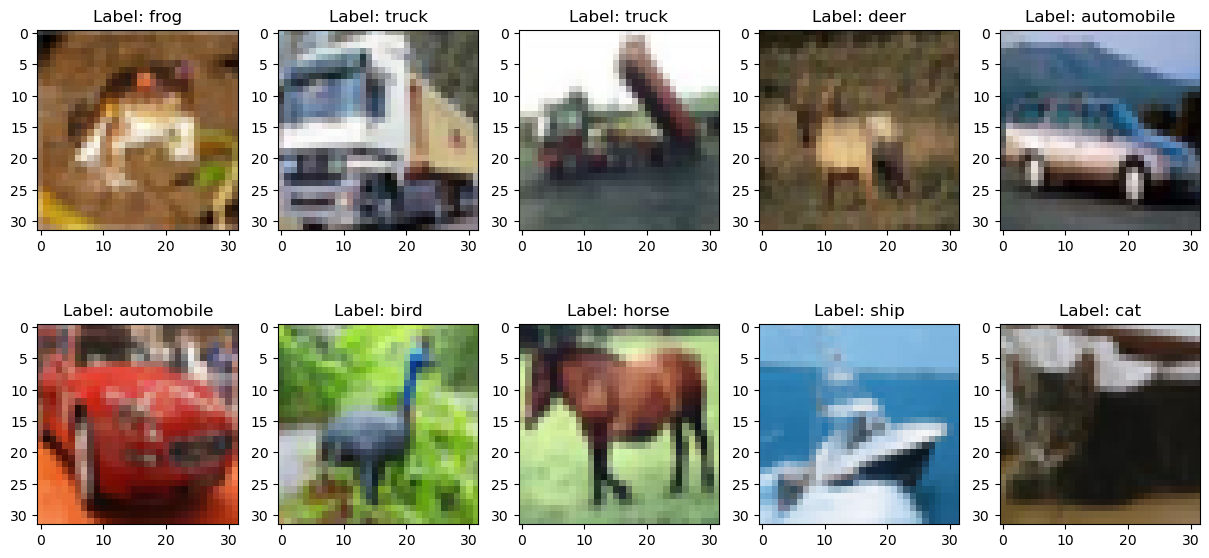

In [4]:
fig, ax = plt.subplots(2,5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_train[:10], y_train[:10])):
  ax[i].imshow(image)
  ax[i].set_title(f"Label: {class_name[label.argmax()]}",  fontsize=12)

# **Training Model**

Create a ResNet-18 model using Keras API. ResNet-18 is a convolutional neural network with 18 layers, designed to address the vanishing gradient problem using residual blocks. These blocks include shortcut connections that allow gradients to flow more easily during training, making it effective for image classification tasks. Afterwards, the model is compiled with an optimizer, loss function, and metrics.

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# import visualkeras
# visualkeras.layered_view(model, scale_xy=10, legend=True)

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 resnet_block (ResnetBlock)  (None, 16, 16, 64)        148736    
                                                  

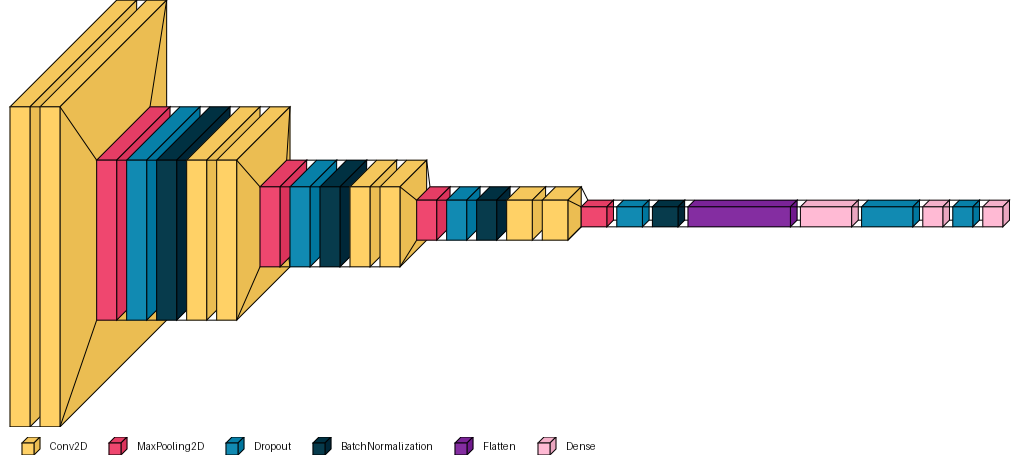

In [8]:
# import visualkeras
# visualkeras.layered_view(model, scale_xy=10, legend=True)

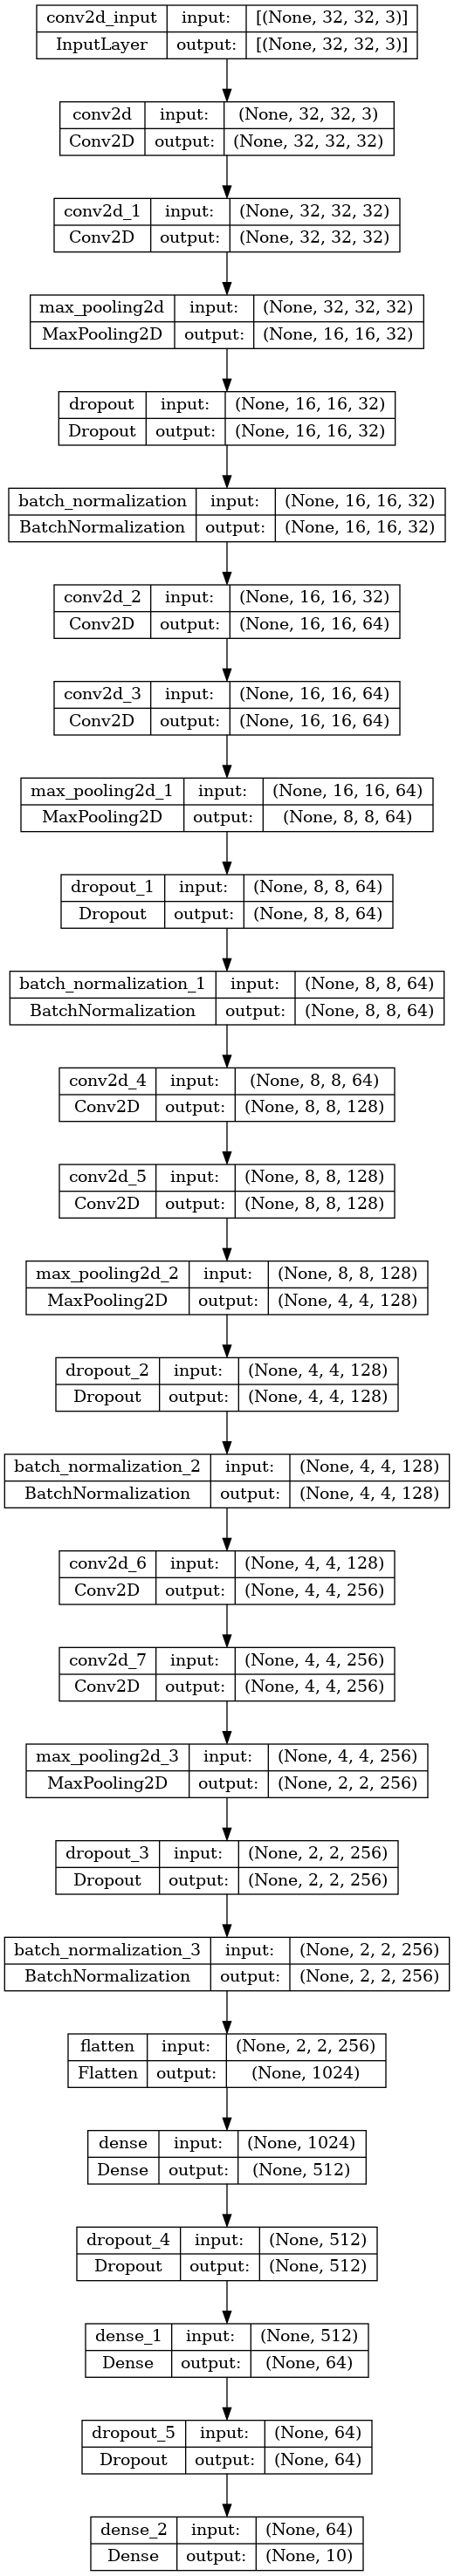

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Fit the model on training data.

In [6]:
# history = model.fit(x_train, y_train, batch_size=64, epochs = 250)
# Save/Load the model 
# model.save('./../models/cifar10_resnet18.tf')
model = tf.keras.models.load_model('./../Models/cifar10_cnn.keras')
model.summary()

2025-01-14 15:49:14.706941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-14 15:49:15.053381: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43944 MB memory:  -> device: 2, name: Quadro RTX 8000, pci bus id: 0000:73:00.0, compute capability: 7.5
2025-01-14 15:49:15.203237: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2025-01-14 15:49:16.477946: W tensorflow/c/c_api.cc:291] Operation '{name:'batch_normalization_8/moving_mean/Assign' id:665 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_8/moving_mean/Assign}} = AssignVaria

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)       

#### Evaluate model accuracy on test data.

In [7]:
loss_test, accuracy_test = model.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

2025-01-14 15:49:21.085402: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_1/mul' id:1374 op device:{requested: '', assigned: ''} def:{{{node loss_1/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_1/mul/x, loss_1/dense_8_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-01-14 15:49:21.281648: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape indropout_12/cond/then/_202/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-01-14 15:49:21.437773: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8902


Accuracy on test data: 85.26%


In [9]:
x_test = x_test[0:100]
y_test = y_test[0:100]

In [10]:
classifier = KerasClassifier(model=model, clip_values=(0.0, 1.0))

### **Zeroth-Order Optimization (ZOO) Attack**

> class art.attacks.evasion.ZooAttack(classifier: CLASSIFIER_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, binary_search_steps: int = 1, initial_const: float = 0.001, abort_early: bool = True, use_resize: bool = True, use_importance: bool = True, nb_parallel: int = 128, batch_size: int = 1, variable_h: float = 0.0001, verbose: bool = True)

The black-box zeroth-order optimization attack from Pin-Yu Chen et al. (2018). This attack is a variant of the C&W attack which uses ADAM coordinate descent to perform numerical estimation of gradients.
* Paper link: https://arxiv.org/abs/1708.03999

*__init__(classifier: CLASSIFIER_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, binary_search_steps: int = 1, initial_const: float = 0.001, abort_early: bool = True, use_resize: bool = True, use_importance: bool = True, nb_parallel: int = 128, batch_size: int = 1, variable_h: float = 0.0001, verbose: bool = True)*

**Create a ZOO attack instance.**

**Parameters**

* classifier – A trained classifier.
* confidence (float) – Confidence of adversarial examples: a higher value produces examples that are farther away, from the original input, but classified with higher confidence as the target class.
* targeted (bool) – Should the attack target one specific class.
* learning_rate (float) – The initial learning rate for the attack algorithm. Smaller values produce better results but are slower to converge.
* max_iter (int) – The maximum number of iterations.
* binary_search_steps (int) – Number of times to adjust constant with binary search (positive value).
* initial_const (float) – The initial trade-off constant c to use to tune the relative importance of distance and confidence. If binary_search_steps is large, the initial constant is not important, as discussed in Carlini and Wagner (2016).
* abort_early (bool) – True if gradient descent should be abandoned when it gets stuck.
* use_resize (bool) – True if to use the resizing strategy from the paper: first, compute attack on inputs resized to 32x32, then increase size if needed to 64x64, followed by 128x128.
* use_importance (bool) – True if to use importance sampling when choosing coordinates to update.
* nb_parallel (int) – Number of coordinate updates to run in parallel. A higher value for nb_parallel should be preferred over a large batch size.
* batch_size (int) – Internal size of batches on which adversarial samples are generated. Small batch sizes are encouraged for ZOO, as the algorithm already runs nb_parallel coordinate updates in parallel for each sample. The batch size is a multiplier of nb_parallel in terms of memory consumption.
* variable_h (float) – Step size for numerical estimation of derivatives.
* verbose (bool) – Show progress bars.

> generate(x: ndarray, y: Optional[ndarray] = None, **kwargs) → ndarray

**Generate adversarial samples and return them in an array.**

**Return type**
* ndarray

**Parameters**
* x (ndarray) – An array with the original inputs to be attacked.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,).

**Returns**
* An array holding the adversarial examples.

**Link**
documetation: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#zeroth-order-optimization-zoo-attack
github: https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/art/attacks/evasion/zoo.py

### Create an ART ZOO attack.

In [11]:
zoo_attack = ZooAttack(classifier = classifier,
                       learning_rate=0.1,
                       targeted = False,
                       max_iter = 500,
                       verbose = True, 
                       batch_size=32, 
                       nb_parallel=32, )

#### Generate adversarial test data.

In [15]:
# x_test_adv = zoo_attack.generate(x_test, y=y_test)
# np.savez('./ZOO_data/ZOO_generated_cifar_test_data.npz', x_test_adv = x_test_adv, y_test = y_test)
test_data = np.load('./ZOO_data/ZOO_generated_cifar_test_data.npz', allow_pickle=True)
x_test_adv, y_test = test_data['x_test_adv'], test_data['y_test']
x_test_adv.shape, y_test.shape

((100, 32, 32, 3), (100, 10))

Visualise the first adversarial test sample.

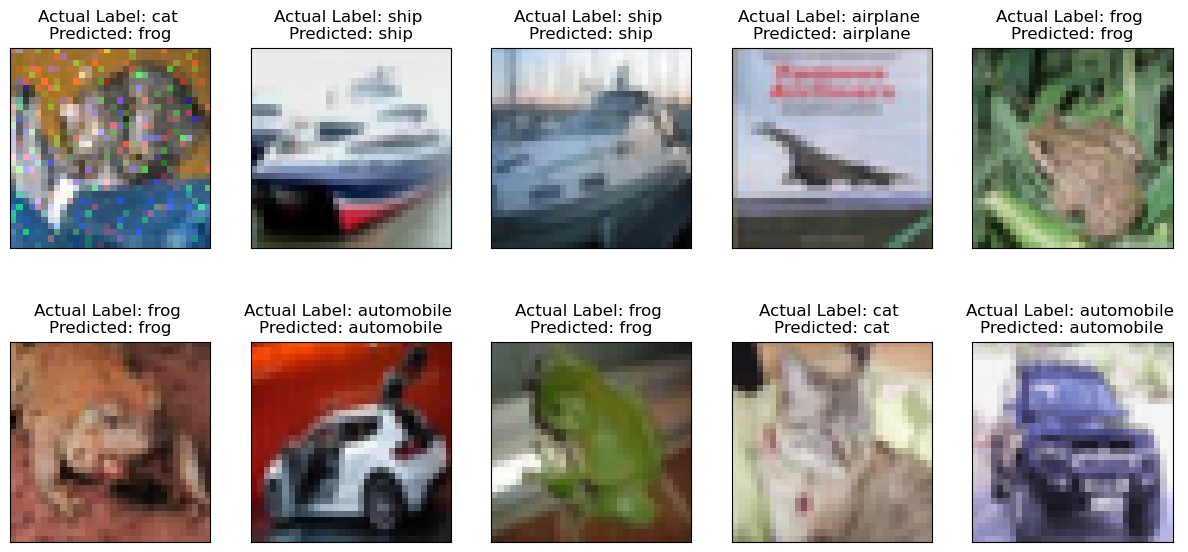

In [13]:
fig, ax = plt.subplots(2,5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
  #im_idx = np.argwhere(y_train == i)[0]
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  ax[i].imshow(image)
  ax[i].set_title(f"Actual Label: {class_name[label.argmax()]} \nPredicted: {class_name[model.predict(np.expand_dims(image, axis=0)).argmax()]}",  fontsize=12)


#### Evaluate the trained model

In [16]:
x_test_pred = np.argmax(model.predict(x_test_adv), axis = 1)
nb_correct_pred = np.sum(x_test_pred == np.argmax(y_test, axis = 1))

print('Original test Data: ')
print('Correctly Classified: {}'.format(nb_correct_pred))
print('Incorrectly Classified: {}'.format(len(x_test) - nb_correct_pred))

Original test Data: 
Correctly Classified: 88
Incorrectly Classified: 12


Training the Detector

We create the second model using Keras API with the same strucure of the classifier. Here we use the Keras Sequential model and add a sequence of layers. Afterwards the model is compiles with optimizer, loss function and metrics. This model will be used to classify between ordinary samples and perturbated ones

In [18]:
detector_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

detector_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# tf.keras.utils.plot_model( model = detector_model, show_shapes = True)

#### Generate Adversarial samples for training the detector model. 

In [20]:
# Generating adversarail training data is time taking process. 
# So, we have decreased the number of samples to 500 to save time, 
# if you do not want to generate yourself, we have the saved data for your in the next chunk of cells. 
x_train_adv = zoo_attack.generate(x_train[:500])
nb_train = x_train[:500].shape[0]

x_train_detector = np.concatenate((x_train[:500], x_train_adv), axis=0)
y_train_detector = np.concatenate((np.array([[1,0]]*nb_train), np.array([[0,1]]*nb_train)), axis=0)

2024-09-30 09:27:06.964315: W tensorflow/c/c_api.cc:291] Operation '{name:'resnet_block_7/residual_15/conv2d_37/kernel/Assign' id:4276 op device:{requested: '', assigned: ''} def:{{{node resnet_block_7/residual_15/conv2d_37/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](resnet_block_7/residual_15/conv2d_37/kernel, resnet_block_7/residual_15/conv2d_37/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


ZOO:   0%|          | 0/16 [00:00<?, ?it/s]

In [20]:
# np.savez('./ZOO_data/ZOO_generated_cifar_detector.npz', x_train_detector = x_train_detector, y_train_detector = y_train_detector)
detector_data = np.load('./ZOO_data/ZOO_generated_cifar_detector.npz')
x_train_detector, y_train_detector = detector_data['x_train_detector'], detector_data['y_train_detector']
x_train_detector.shape, y_train_detector.shape

((1000, 32, 32, 3), (1000, 2))

Note: the robust classifier has the same architecture as above, except the first dense layer has 1024 instead of 128 units. (This was recommend by Madry et al. (2017), Towards Deep Learning Models Resistant to Adversarial Attacks)

In [21]:
detector_model.fit(x_train_detector, y_train_detector, batch_size=32, epochs=10)

Train on 1000 samples


2024-09-30 09:28:37.069758: W tensorflow/c/c_api.cc:291] Operation '{name:'training/Adam/resnet_block_4/residual_8/conv2d_20/kernel/v/Assign' id:5531 op device:{requested: '', assigned: ''} def:{{{node training/Adam/resnet_block_4/residual_8/conv2d_20/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/resnet_block_4/residual_8/conv2d_20/kernel/v, training/Adam/resnet_block_4/residual_8/conv2d_20/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch 1/10
1000/1000 [==============================] - 3s 3ms/sample - loss: 1.0606 - accuracy: 0.3630
Epoch 2/10
1000/1000 [==============================] - 1s 703us/sample - loss: 0.8219 - accuracy: 0.4450
Epoch 3/10
1000/1000 [==============================] - 1s 698us/sample - loss: 0.7782 - accuracy: 0.4350
Epoch 4/10
1000/1000 [==============================] - 1s 713us/sample - loss: 0.7610 - accuracy: 0.4260
Epoch 5/10
1000/1000 [==============================] - 1s 756us/sample - loss: 0.7164 - accuracy: 0.4900
Epoch 6/10
1000/1000 [==============================] - 1s 849us/sample - loss: 0.7161 - accuracy: 0.4610
Epoch 7/10
1000/1000 [==============================] - 1s 934us/sample - loss: 0.7168 - accuracy: 0.4600
Epoch 8/10
1000/1000 [==============================] - 1s 930us/sample - loss: 0.7083 - accuracy: 0.4510
Epoch 9/10
1000/1000 [==============================] - 1s 945us/sample - loss: 0.7068 - accuracy: 0.4760
Epoch 10/10
1000/1000 [=========================

#### Evaluate the adversarial generated data

In [25]:
x_test = x_test[:100]
nb_test = x_test.shape[0]

x_test_detector = np.concatenate((x_test, x_test_adv[:100]), axis=0)
y_test_detector = np.concatenate((np.array([[1,0]]*nb_test), np.array([[0,1]]*nb_test)), axis=0)

In [26]:
x_test_detector.shape, y_test_detector.shape

((200, 32, 32, 3), (200, 2))

In [27]:
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

2024-09-30 09:30:14.420306: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_2/mul' id:4541 op device:{requested: '', assigned: ''} def:{{{node loss_2/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_2/mul/x, loss_2/dense_3_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Accuracy on test data: 50.00%


In [28]:
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)
detector = BinaryInputDetector(detector_classifier)

In [29]:
detector.fit(x_train_detector, y_train_detector, nb_epochs=3, batch_size=32)

### Evaluating the detector

Apply the detector to the adversarial test data:

In [30]:
_, is_adversarial = detector.detect(x_test_adv)
flag_adv = np.sum(is_adversarial)

print("Adversarial test data (first 100 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(100 - flag_adv))

2024-09-30 09:30:28.764296: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_3/Softmax' id:4465 op device:{requested: '', assigned: ''} def:{{{node dense_3/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Adversarial test data (first 100 images):
Flagged: 54
Not flagged: 46


Apply the detector to the first 100 original test images:

In [31]:
_, is_adversarial = detector.detect(x_test)
flag_original = np.sum(is_adversarial)

print("Original test data (first 100 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(100 - flag_original))

Original test data (first 100 images):
Flagged: 28
Not flagged: 72


Evaluate the robust classifier's performance on the adversarial test data (black-box setting):

In [134]:
learning_rate = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3]
nb_flag_adv = []
nb_missclass = []


zoo_attack.set_params(**{'max_iter' : 10})

for rate in learning_rate:
    zoo_attack.set_params(**{'learning_rate': rate})
    x_test_adv = zoo_attack.generate(x_test[:100])
    nb_flag_adv += [np.sum(detector.detect(x_test_adv)[1])]
    nb_missclass += [np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))]

learning_range = [0] + learning_rate
nb_flag_adv = [flag_original] + nb_flag_adv
nb_missclass = [2] + nb_missclass

ZOO:   0%|          | 0/4 [00:00<?, ?it/s]

ZOO: 100%|██████████| 4/4 [02:02<00:00, 30.74s/it]


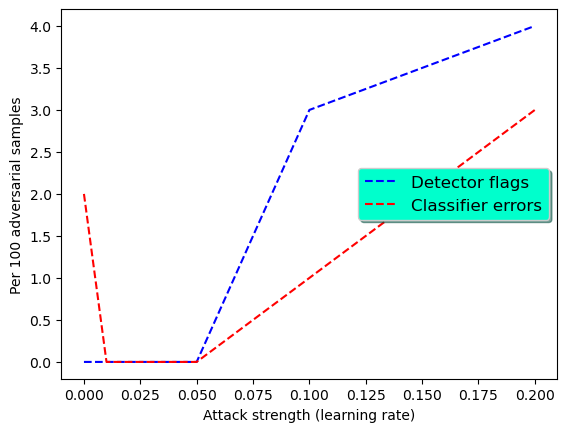

In [135]:
fig, ax = plt.subplots()
ax.plot(np.array(learning_range)[:8], np.array(nb_flag_adv)[:8], 'b--', label='Detector flags')
ax.plot(np.array(learning_range)[:8], np.array(nb_missclass)[:8], 'r--', label='Classifier errors')

legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

plt.xlabel('Attack strength (learning rate)')
plt.ylabel('Per 100 adversarial samples')
plt.show()

Evaluate the adversarial generated data

### **Summary**


#### Zeroth-Order Optimization (ZOO) Attack and Binary Input Detector Using CIFAR-10

This notebook demonstrates the implementation of the ZOO attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the CIFAR-10 dataset. The tasks covered include:

1. **Load the Required Libraries:** Import necessary Python libraries and modules, including TensorFlow/Keras and ART.
2. **Load the Dataset and Inspect the Data:** Load and visualize the CIFAR-10 dataset.
3. **Create a Deep Learning Model:** Construct and compile a ResNet-18 model.
4. **Train and Evaluate the Model:** Train the model on CIFAR-10 and evaluate its accuracy.
5. **Implement ZOO Attack Using ART:** The Zeroth Order Optimization (ZOO) attack is notable for its effectiveness in black-box settings, where only the model's output is accessible.
6. **Create Adversarial Samples Using ZOO:** Generate adversarial examples from the test images using ZOO and visually inspect them.
7. **Evaluate Against Adversarial Samples:** Test the model's robustness by evaluating its accuracy on the adversarial samples.
8. **Create a Detector Model:** Develop a binary classifier to detect adversarial inputs by differentiating between original and adversarial images.
9. **Train and Evaluate the Detector:** Train the detector using a labeled dataset of original and adversarial samples, and evaluate its accuracy in identifying adversarial attacks.

This summary highlights the process and key tasks involved in implementing the ZOO attack and developing a binary input detector using the CIFAR-10 dataset, illustrating the importance of adversarial defenses in machine learning.